In [1]:
import processloglib as lib
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Video
import os
import subprocess
from pathlib import Path
import pathlib

source_folder = "~/data_check/"
fps = 30
n0 = 0
n1 = 3 * fps #take only the first 3 seconds, because that makes the human classification a  lot faster

source_folder = os.path.expanduser(source_folder)

dest_folder = Path(source_folder,'checked')
pathlib.Path(dest_folder).mkdir(parents=True, exist_ok=True)

files = lib.list_csv_files(source_folder)


No moth because: velocity zero
Not enough rows
Not enough rows
No moth because: velocity zero
No moth because: velocity zero
No moth because: velocity zero
No moth because: velocity zero
No moth because: velocity zero
No moth because: velocity zero
Not enough rows
No moth because: velocity zero
No moth because: velocity zero
Not enough rows
No moth because: velocity zero
No moth because: velocity zero
No moth because: velocity zero
No moth because: velocity zero
Not enough rows
Not enough rows
Not enough rows
Not enough rows
No moth because: velocity zero
MOTH DETECTED!


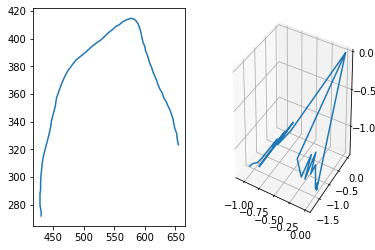

Human, is this a actually moth? [y/n/q] y


moth_00008_7.csv
True
Added to moth dataset
Not enough rows
Not enough rows
Not enough rows
Not enough rows
Not enough rows
Not enough rows
No moth because: velocity zero
No moth because: velocity zero
No moth because: velocity zero
Not enough rows
Not enough rows
No moth because: velocity zero
No moth because: velocity zero
No moth because: file size too small
Not enough rows
No moth because: velocity zero
No moth because: velocity zero
No moth because: velocity zero
MOTH DETECTED!


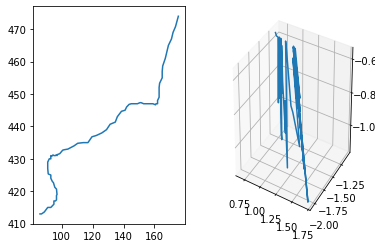

Human, is this a actually moth? [y/n/q] q


moth_00008_5.csv
True
Quitting


In [2]:

from shutil import copyfile
from IPython.display import clear_output

quitnow = False #pfff, jupyter is stupid
for f in files:
    if quitnow:
        break
    csv_file = Path(source_folder,f)
    mp4_file = os.path.splitext(Path(source_folder,f))[0] + '.mp4'
    tmp_file = os.path.splitext(Path(source_folder,f))[0] + '.tmp.mp4'

    t0 = n0 / fps
    t1 = n1 / fps

    res,log = lib.check_log(csv_file,[],True)
    if res:
        imLx,imLy,RS_ID,posX,posY,posZ = lib.get_chunk(log,n0,n1)

        posX = posX[imLx > 0]
        posY = posY[imLx > 0]
        posZ = posZ[imLx > 0]

        imLx = imLx[imLx > 0]
        imLy = imLy[imLy > 0]
        
        fig = plt.figure()
        ax = fig.add_subplot(121)
        ax.plot(imLx,imLy)
        
        ax = fig.add_subplot(122, projection='3d')
        ax.plot(posX,posY,posZ)
        plt.show()

        subprocess.call(['ffmpeg', '-ss', str(t0), '-to', str(t1) , '-y', '-i', mp4_file, '-c:v' , 'copy', tmp_file])
        #subprocess.call(['totem',  tmp_file])
        v = Video(tmp_file,embed=True,width=1000)
        display(v)
        

        while True:
            res = input("Human, is this a actually moth? [y/n/q]")
            
            file_id = os.path.basename(csv_file)
            old_classify_moth_result = not 'no_moth_' in file_id
            file_id = file_id.replace('no_moth_','')
            file_id = file_id.replace('moth_','')
            file_id = file_id.replace('.csv','')
            
            if res == 'y':
                mp4_filename = 'moth_' + file_id + '.mp4'
                csv_filename = 'moth_' + file_id + '.csv'
                copyfile(mp4_file, Path(dest_folder,mp4_filename))
                copyfile(csv_file, Path(dest_folder,csv_filename))
                if not old_classify_moth_result:
                    print('DETECTED FALSE NEGATIVE')
                print('Added to moth dataset')
                break
            elif res == 'n':
                mp4_filename = 'no_moth_' + file_id + '.mp4'
                csv_filename = 'no_moth_' + file_id + '.csv'
                copyfile(mp4_file, Path(dest_folder,mp4_filename))
                copyfile(csv_file, Path(dest_folder,csv_filename))
                if old_classify_moth_result:
                    print('DETECTED FALSE POSITIVE')
                print('Added to no moth dataset')
                break
            elif res == 'q':
                print("Quitting")
                quitnow = True
                break
            print('Type y or n! Or q if you\'re a quitter')
        #clear_output(wait=False)

